<a href="https://colab.research.google.com/github/heleph4nt/GOmarin/blob/main/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
#On les récupère en fichier npz :

def load_embeddings_npz(npz_path):
    npz_data = np.load(npz_path)
    return {key: npz_data[key] for key in npz_data.files}

embeddings_original = load_embeddings_npz('/content/cyanobact.original.long.prots.npz')
embeddings_shuffle = load_embeddings_npz('/content/cyanobact.long.prots.shuffled.npz')
array_embeddings_original=np.array(embeddings_original['embeddings'])
array_embeddings_shuffle=np.array(embeddings_shuffle['embeddings'])


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


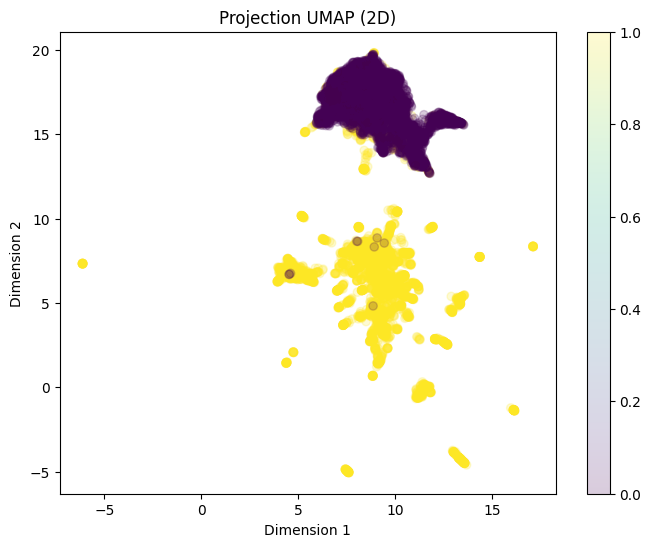

In [ ]:
# Charger le jeu de données exemple
data_reel=array_embeddings_original

data_shuffle=array_embeddings_shuffle

reel=np.array([[1]])
shuffle=np.array([[0]])
data_concat=np.zeros((len(data_reel)+len(data_shuffle), len(data_reel[0])+1), dtype = "int")

for i in range(len(data_reel)):
  data_concat[i]=np.concatenate((reel, data_reel[i]), axis=None)

for i in range(len(data_shuffle)):
  data_concat[i+len(data_reel)]=np.concatenate((shuffle, data_shuffle[i]), axis=None)

X = data_concat[:,1:] # Données d'entrée : vecteurs
y = data_concat[:, 0] # Label : 1 : reel, 0 : shuffle

# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y, alpha=0.2)
plt.colorbar()
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


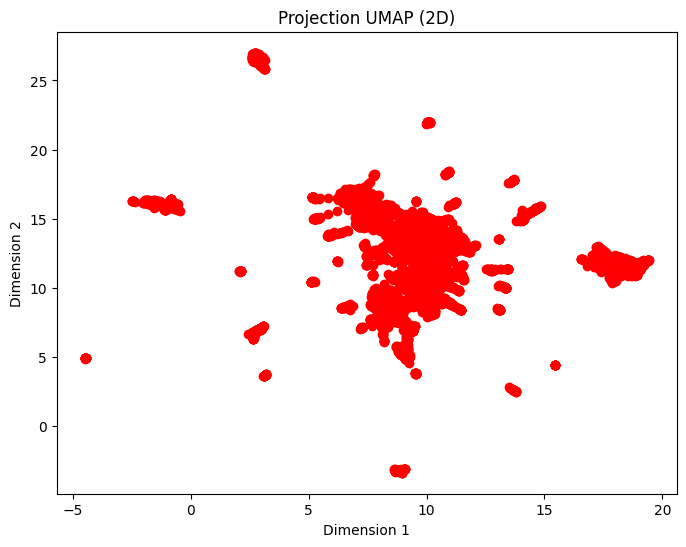

In [ ]:
# Charger le jeu de données
data_reel=array_embeddings_original

X = data_reel # Données d'entrée : vecteurs

# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c="red")
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

13727


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


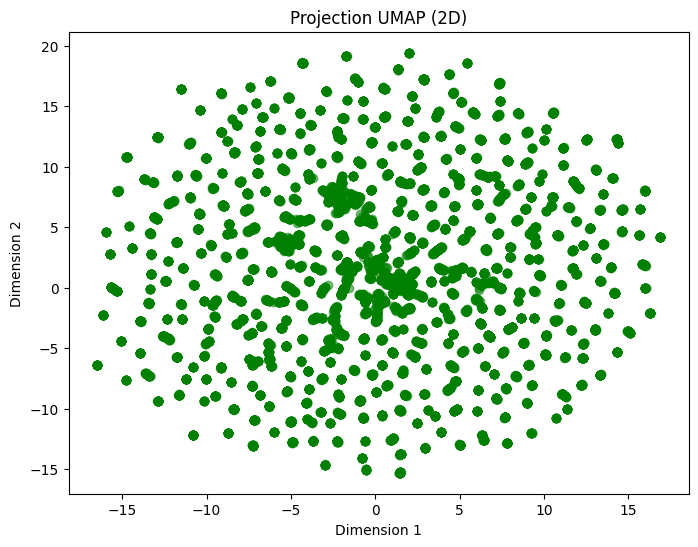

In [14]:
#Cyanobactéries issues de SwissProt
# Charger le jeu de données
embeddings_swissprot = load_embeddings_npz('/content/cyanobacteria_swissprot.npz')
array_embeddings_swissprot=np.array(embeddings_swissprot['embeddings'])

X = array_embeddings_swissprot # Données d'entrée : vecteurs
print(len(X))
# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c="green", alpha=0.5)
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


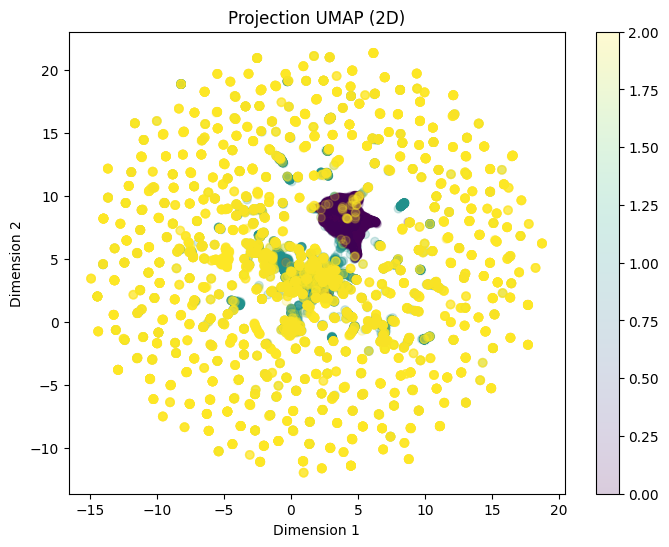

In [15]:
# Charger le jeu de données
data_reel=array_embeddings_original

data_shuffle=array_embeddings_shuffle

data_swissprot=array_embeddings_swissprot

reel=np.array([[1]])
shuffle=np.array([[0]])
swissprot=np.array([2])
data_concat=np.zeros((len(data_reel)+len(data_shuffle)+len(data_swissprot), len(data_reel[0])+1), dtype = "int")

for i in range(len(data_reel)):
  data_concat[i]=np.concatenate((reel, data_reel[i]), axis=None)

for i in range(len(data_shuffle)):
  data_concat[i+len(data_reel)]=np.concatenate((shuffle, data_shuffle[i]), axis=None)

for i in range(len(data_swissprot)):
  data_concat[i+len(data_reel)+len(data_shuffle)]=np.concatenate((swissprot, data_swissprot[i]), axis=None)

X = data_concat[:,1:] # Données d'entrée : vecteurs
y = data_concat[:, 0] # Label : 1 : reel, 0 : shuffle, 2 : swissprot

# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y, alpha=0.2)
plt.colorbar()
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [ ]:
### ANCIEN TEST
# Charger le jeu de données exemple
data_reel=np.array([[8,5,9,3,4], [8,9,7,6,8], [4,7,9,6,5], [7,4,8,9,6]])

data_shuffle=np.array([[6,7,2,1,2], [3,4,2,5,2], [2,5,4,3,4], [1,2,3,4,5]])

X = data_reel # Données d'entrée : vecteurs
X2 = data_shuffle

# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X2_standardized = scaler.fit_transform(X2)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)
X_umap_2d_2 = umap_2d.fit_transform(X2_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c="red")
plt.scatter(X_umap_2d_2[:, 0], X_umap_2d_2[:, 1], c="blue")
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()